<a href="https://colab.research.google.com/github/DanRMO/MPV_SPRINT_II/blob/main/MVP_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import seaborn as sns # para plotar o heatmap
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import cross_validate # para executar a validação cruzada
from sklearn.metrics import classification_report # para exibir o relatório com precisão, recall e f1 score
from sklearn.metrics import accuracy_score # para a exibição da acurácia do modelo
from sklearn.neighbors import KNeighborsClassifier # algoritmo KNN
from sklearn.tree import DecisionTreeClassifier # algoritmo Árvore de Classificação
from sklearn.naive_bayes import GaussianNB # algoritmo Naive Bayes
from sklearn.svm import SVC # algoritmo SVM
from sklearn.model_selection import cross_val_score
from yellowbrick.classifier import ConfusionMatrix


In [94]:
# Importação de dataset
url = 'https://raw.githubusercontent.com/DanRMO/trabalhocancer/main/Cancer_Data.csv'

# Lê o arquivo
dados = pd.read_csv(url, delimiter =',')

# Mostra as primeiras linhas do dataset
dados.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [95]:
# verificando os tipos de dados do dataset
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [96]:
dados_limpo = dados.drop('Unnamed: 32', axis=1, inplace=False)

dados_limpo.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [97]:
#verificando quais os valores que possui a coluna income
unique_values = dados_limpo['diagnosis'].unique()
print(unique_values)

['M' 'B']


In [98]:
# tratando os valores da coluna income (target) usando dicionário do pandas
income_dic = {'M' : 0,
              'B' : 1}

dados_limpo['diagnosis'] = dados_limpo[['diagnosis']].replace(income_dic)
dados_limpo.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [99]:
#separando o target do dataset

X = dados_limpo.drop(columns = 'diagnosis')
y = dados_limpo['diagnosis']



In [100]:

# faz a divisão
SEED = 10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=SEED)

#verificando o tamanho da base de treino e de teste
base_treino = X_train.shape[0]
base_teste = X_test.shape[0]
print('A base de teste de treino tem %s elementos e a base de teste tem %s elementos.' %(base_treino, base_teste))

A base de teste de treino tem 455 elementos e a base de teste tem 114 elementos.


In [101]:
# Criando um classificador baseado em árvores
clf = RandomForestClassifier(random_state=10)

# Realizando a seleção de características com base na importância
feature_selector = SelectFromModel(clf, threshold='median')
X_train_selected = feature_selector.fit_transform(X_train, y_train)
X_test_selected = feature_selector.transform(X_test)

# Obtendo os índices das características selecionadas
feature_indices = feature_selector.get_support(indices=True)

# Obtendo os nomes das características selecionadas
feature_names = X.columns[feature_indices]

# Imprimindo as características selecionadas
print("Características selecionadas:")
for feature in feature_names:
    print(feature)

Características selecionadas:
radius_mean
texture_mean
perimeter_mean
area_mean
compactness_mean
concavity_mean
concave points_mean
perimeter_se
area_se
radius_worst
texture_worst
perimeter_worst
area_worst
concavity_worst
concave points_worst
symmetry_worst


In [102]:
#verificando quantas colunas ficaram após fazer o feature selection

print(X_train_selected.shape)

(455, 16)


In [103]:
# Criando os folds para a validação cruzada
num_particoes = 25 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=5)


KNN: 0.927836 (0.066238)
CART: 0.919181 (0.077139)
NB: 0.945731 (0.066064)
SVM: 0.916725 (0.063191)


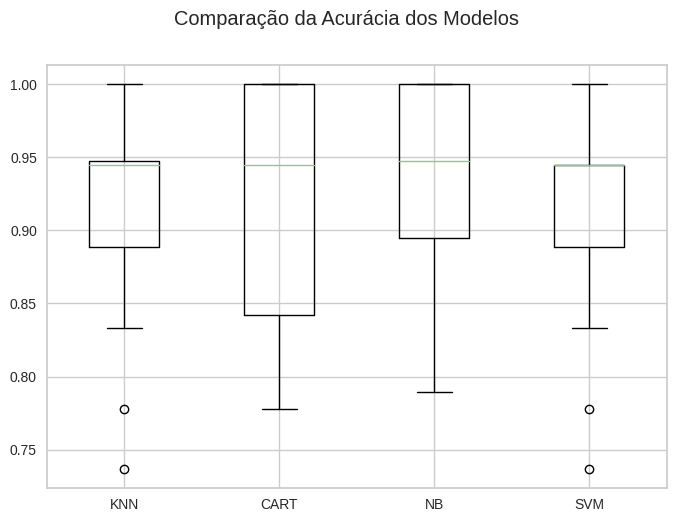

In [104]:
# Modelagem

# Definindo uma seed global para esta célula de código
np.random.seed(10)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Avaliando um modelo por vez
for name, model in models:
  cv_results = cross_val_score(model, X_train_selected, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # média e desvio padrão dos 10 resultados da validação cruzada
  print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação da Acurácia dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [105]:
#define uma semente aleatória para obter os mesmos resultados aleatórios
np.random.seed(10)

modelo = GaussianNB()
results = cross_validate(modelo, X, y, cv = 5, return_train_score=False)
media = results ['test_score'].mean()
desvio_padrao = results['test_score'].std()
print("Acurácia com cross validation = [%.2f, %.2f]" % ((media - 2 *desvio_padrao) * 100, (media + 2 * desvio_padrao) * 100))

Acurácia com cross validation = [60.12, 63.96]


In [106]:
nb = GaussianNB()
nb.fit(X_train_selected, y_train)
predicts = nb.predict(X_test_selected)
predicts

array([0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0])

In [107]:
accuracy_score(y_test, predicts) # não executar o escalonamento

0.9385964912280702

0.9385964912280702

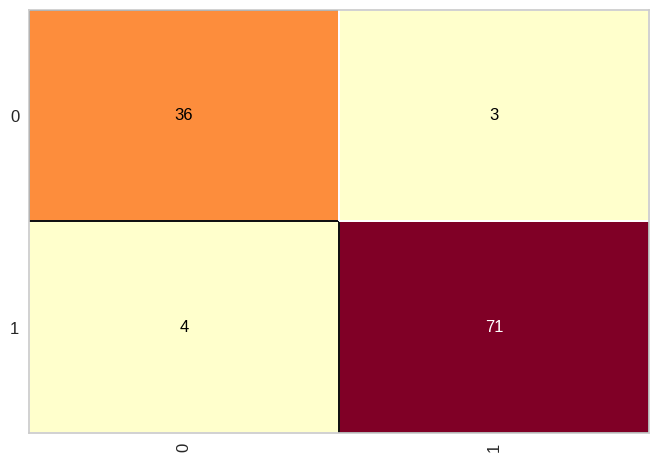

In [110]:
cm = ConfusionMatrix(nb)
cm.fit(X_train_selected, y_train)
cm.score(X_test_selected, y_test)
